<a href="https://colab.research.google.com/github/mayujie/MSC_text_mining/blob/master/RD_dataprepare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Amazon product data](http://jmcauley.ucsd.edu/data/amazon/index_2014.html)
# [Amazon product data Julian McAuley, UCSD](http://jmcauley.ucsd.edu/data/amazon/)
Files

"Small" subsets for experimentation


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
root_path = '/content/drive/My Drive/Colab/MSC_RD'
root_path

'/content/drive/My Drive/Colab/MSC_RD'

## **Read from text file**

In [ ]:
### download text data
!gdown https://drive.google.com/uc?id=1PtUMY6KuShzR2lk_85VbNizGT_wciBNl

Downloading...
From: https://drive.google.com/uc?id=1PtUMY6KuShzR2lk_85VbNizGT_wciBNl
To: /content/reviews_text.zip
468MB [00:02, 216MB/s]


In [ ]:
!unzip reviews_text.zip

Archive:  reviews_text.zip
  inflating: reviews_text.txt        


In [ ]:
!rm /content/reviews_text.zip

In [ ]:
!ls -lh *.txt

-rw-r--r-- 1 root root 1.2G Oct  5 22:35 reviews_text.txt


In [ ]:
handle_list = []
with open('/content/reviews_text.txt', 'r') as file:
  for line in file:
    handle_list.append(line)

In [ ]:
## each element in list has \n at the end
print(len(handle_list))
handle_list[1]

2360871


'I highly recommend this series. It is a must for anyone who is yearning to watch "grown up" television. Complex characters and plots to keep one totally involved. Thank you Amazin Prime.\n'

In [ ]:
handle_list[:5]

["I had big expectations because I love English TV, in particular Investigative and detective stuff but this guy is really boring. It didn't appeal to me at all.\n",
 'I highly recommend this series. It is a must for anyone who is yearning to watch "grown up" television. Complex characters and plots to keep one totally involved. Thank you Amazin Prime.\n',
 "This one is a real snoozer. Don't believe anything you read or hear, it's awful. I had no idea what the title means. Neither will you.\n",
 'Mysteries are interesting.  The tension between Robson and the tall blond is good but not always believable.  She often seemed uncomfortable.\n',
 'This show always is excellent, as far as british crime or mystery showsgoes this is one of the best ever made.  The stories are well done and the acting is top notch with interesting twists in the realistic and brutal storylines.  This show pulls no punches as it enters into the twisted minds of criminals and the profiler psychiatrist who helps out

## remove newline '\n' from each row

In [ ]:
text_ls = map(lambda s: s.strip(), handle_list)
text_ls = list(text_ls)
text_ls[:5]

["I had big expectations because I love English TV, in particular Investigative and detective stuff but this guy is really boring. It didn't appeal to me at all.",
 'I highly recommend this series. It is a must for anyone who is yearning to watch "grown up" television. Complex characters and plots to keep one totally involved. Thank you Amazin Prime.',
 "This one is a real snoozer. Don't believe anything you read or hear, it's awful. I had no idea what the title means. Neither will you.",
 'Mysteries are interesting.  The tension between Robson and the tall blond is good but not always believable.  She often seemed uncomfortable.',
 'This show always is excellent, as far as british crime or mystery showsgoes this is one of the best ever made.  The stories are well done and the acting is top notch with interesting twists in the realistic and brutal storylines.  This show pulls no punches as it enters into the twisted minds of criminals and the profiler psychiatrist who helps out in a no

In [ ]:
## read data into dataframe
import pandas as pd
df_review = pd.DataFrame(text_ls) 
df_review

,0
0,I had big expectations because I love English ...
1,I highly recommend this series. It is a must f...
2,This one is a real snoozer. Don't believe anyt...
3,Mysteries are interesting. The tension betwee...
4,"This show always is excellent, as far as briti..."
...,...
2360866,Funny people on here are rating sellers that a...
2360867,All this is is the Deluxe 32GB Wii U with Mari...
2360868,The package should have more red on it and sho...
2360869,Can get this at Newegg for $329.00 and the pac...


In [ ]:
del handle_list

## check the length of characters each row, and find max & min len of characters

In [ ]:
## check 1st row in df_review
len(df_review.values[0][0])

159

In [ ]:
## put all the characters length of rows into list
len_review = []

for raw in df_review.values:
  len_review.append(len(raw[0]))

In [ ]:
len_review[:10]

[159, 186, 134, 141, 1300, 3039, 99, 348, 186, 127]

In [ ]:
## find the max and min characters length
max(len_review), min(len_review)

(32689, 0)

In [ ]:
## return the index of max and min characters length
len_review.index(max(len_review)), len_review.index(min(len_review))

(2300312, 78296)

In [ ]:
## put in the founded index and check it's the same as before
len_review[2300312], len_review[78296]

(32689, 0)

In [ ]:
print(len(df_review.values[2300312][0]))
df_review.values[2300312][0]

32689


'For those that haven\'t finished Mass Effect 3, the first part of my review will be spoiler free, but the second part must be rife with spoilers because the story and ending is the biggest problem of the game. I\'ll also preface this review by saying that the ME series had been probably my favorite gaming series of all times, and I beat the campaign of ME1 three times while I finished the campaign of ME2 four times. I had been incredibly excited about the game, and had been able to avoid practically every spoiler except for two smaller ones about EDI and the Prothean character. Even though the game is flawed, I loved pretty much 99% of the game, but the ending was so bad that it has ruined my entire Mass Effect experience. I was going to play the game again with my female character as I loved the voice over work of Jennifer Hale, but now I don\'t really want to. I was even going to start a new character in ME1 and play all three games in succession, but now it just isn\'t worth it.So,

In [ ]:
## for this row with max characters length, after spliting this row has 5803 wors
print(df_review.values[2300312][0].split()[:20])
len(df_review.values[2300312][0].split())

['For', 'those', 'that', "haven't", 'finished', 'Mass', 'Effect', '3,', 'the', 'first', 'part', 'of', 'my', 'review', 'will', 'be', 'spoiler', 'free,', 'but', 'the']


5803

In [ ]:
## this row was empty
print(len(df_review.values[78296][0]))
df_review.values[78296][0]

0


''

In [ ]:
# count how many rows are empty
count_zero = 0

for raw in df_review.values:
  if len(raw[0]) == 0:
    count_zero += 1

In [ ]:
# there are 224 rows with empty reviews
count_zero

224

In [ ]:
## put empty index of row into list
review_zero = []

for i, raw in enumerate(df_review.values):
  if len(raw[0]) == 0:
    review_zero.append((i, raw))

print(review_zero[:15])
len(review_zero)

[(78296, array([''], dtype=object)), (88482, array([''], dtype=object)), (167533, array([''], dtype=object)), (200674, array([''], dtype=object)), (217381, array([''], dtype=object)), (231693, array([''], dtype=object)), (270647, array([''], dtype=object)), (649890, array([''], dtype=object)), (721888, array([''], dtype=object)), (751274, array([''], dtype=object)), (790081, array([''], dtype=object)), (792292, array([''], dtype=object)), (796748, array([''], dtype=object)), (797669, array([''], dtype=object)), (799997, array([''], dtype=object))]


224

In [ ]:
import numpy as np

np.asarray(len_review)

array([159, 186, 134, ..., 280, 112, 592])

Text(-8.700000000000003, 0.5, 'Len')

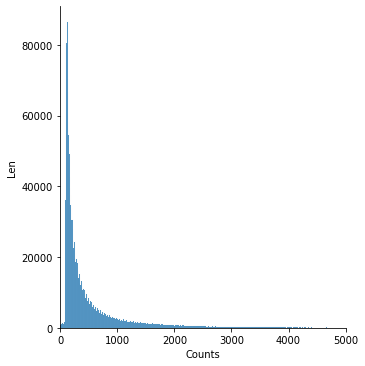

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(np.asarray(len_review))

plt.xlim(-10, 5000)
plt.xlabel('Counts')
plt.ylabel('Len')

In [ ]:
%whos

Variable      Type             Data/Info
----------------------------------------
count_zero    int              224
df_review     DataFrame                                 <...>2360871 rows x 1 columns]
drive         module           <module 'google.colab.dri<...>s/google/colab/drive.py'>
file          TextIOWrapper    <_io.TextIOWrapper name='<...>ode='r' encoding='UTF-8'>
html          module           <module 'html' from '/usr<...>hon3.6/html/__init__.py'>
i             int              2360870
len_review    list             n=2360871
line          str              This is not real, you can<...>cture.  Just be warned.\n
np            module           <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd            module           <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
plt           module           <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
raw           ndarray          1: 1 elems, type `object`, 8 bytes
review_zero   list             n=224
root

In [ ]:
del count_zero

In [ ]:
def check_part(start, end, data):
  print(data.values[start:end])

In [ ]:
check_part(0, 500, df_review)

[["I had big expectations because I love English TV, in particular Investigative and detective stuff but this guy is really boring. It didn't appeal to me at all."]
 ['I highly recommend this series. It is a must for anyone who is yearning to watch "grown up" television. Complex characters and plots to keep one totally involved. Thank you Amazin Prime.']
 ["This one is a real snoozer. Don't believe anything you read or hear, it's awful. I had no idea what the title means. Neither will you."]
 ['Mysteries are interesting.  The tension between Robson and the tall blond is good but not always believable.  She often seemed uncomfortable.']
 ['This show always is excellent, as far as british crime or mystery showsgoes this is one of the best ever made.  The stories are well done and the acting is top notch with interesting twists in the realistic and brutal storylines.  This show pulls no punches as it enters into the twisted minds of criminals and the profiler psychiatrist who helps out in

In [ ]:
check_part(2360370, 2360870, df_review)

[["I bought this headset for using at work, since we exclusively use Skype and VOIP for communication. The problem with this headset is that it is flashy and looks like a gaming headset. Trying it out at home my wife LOL'd when she saw me testing it out and said I looked like funny, with the bright glowing red LEDs on the side of my head. My 12-year old son thought it looked &#34;awesome&#34; and asked that I buy a pair for him.  That being said, I can't really take these headphones into the office for work. Now on to the quality....Buying a brand I never heard of before, I wasn't expecting the quality product that I received. The packaging and build quality are exceptional. You get a nice box, complete with high-quality printed manual, a poster, various stickers, and nice black storage case with metal clasped drawstring. The surround sound quality and effects are amazing. Also, I ordered the 5.1 version, but I received the 7.1 version. This version must be a new product, as the 5.1 dr

stopwards removal will not consider in this case 

In [ ]:
# from nltk.corpus import stopwords
# import nltk
# nltk.download('stopwords')
# stopwords_list = stopwords.words('english')
# print(stopwords_list)
# len(stopwords_list)

About [contractions](https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python)

https://stackoverflow.com/questions/44865840/how-to-treat-numbers-inside-text-strings-when-vectorizing-words

https://www.w3schools.com/python/python_regex.asp#findall

https://stackoverflow.com/questions/46931715/missing-word-in-word-embedding

https://stackoverflow.com/questions/53837088/embedding-vs-inserting-word-vectors-directly-to-input-layer

https://www.rexegg.com/regex-quickstart.html

# Preprocess data

https://towardsdatascience.com/nlp-for-beginners-cleaning-preprocessing-text-data-ae8e306bef0f

https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0

In [ ]:
%whos

Variable      Type             Data/Info
----------------------------------------
check_part    function         <function check_part at 0x7f5f2163a488>
df_review     DataFrame                                 <...>2360871 rows x 1 columns]
drive         module           <module 'google.colab.dri<...>s/google/colab/drive.py'>
file          TextIOWrapper    <_io.TextIOWrapper name='<...>ode='r' encoding='UTF-8'>
html          module           <module 'html' from '/usr<...>hon3.6/html/__init__.py'>
i             int              2360870
len_review    list             n=2360871
line          str              This is not real, you can<...>cture.  Just be warned.\n
np            module           <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd            module           <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
plt           module           <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
raw           ndarray          1: 1 elems, type `object`, 8 bytes
revie

In [ ]:
## clean text
import re


def clean_str(string):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string) ## replace punctuation only keep (),!?'`
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string) ## two space

    return string.strip().lower()

In [ ]:
text_review = [clean_str(sent[0]) for sent in df_review.values]

## compare after clean_str function

In [ ]:
text_review[485:500]

['i was hooked after the first episode i love the concept a blood splatter expert who seconds as a serial killer that preys upon other serial killers michael c hall seems as if he was born to play the role of dexter every season there seems to be one central character that dexter must hunt down , amongst various other serial killers and murders that end up getting chopped up on his table this season follows dexter 8217 s pursuit of the ice truck killer 8212 a sadistic serial killer that chops bodies into pieces after draining all of their blood he 8217 s named the ice truck killer because it is believed that he drives around in an ice truck before dumping the bodies off great pilot season if you have not seen this show , this is definitely one you do not want to miss',
 "this is n't one of those shows or movies about a serial killer who just does it for fun dexter morgan targets people very specifically and only those whom he believes have crossed a line or violated one of his standard

In [ ]:
text_ls[485:500]

['I was hooked after the first episode.  I love the concept: a blood splatter expert who seconds as a serial killer that preys upon other serial killers.  Michael C. Hall seems as if he was born to play the role of Dexter.  Every season there seems to be one central character that Dexter must hunt down, amongst various other serial killers and murders that end up getting chopped up on his table.  This season follows Dexter&#8217;s pursuit of the Ice Truck Killer&#8212;a sadistic serial killer that chops bodies into pieces after draining all of their blood.  He&#8217;s named the Ice Truck Killer because it is believed that he drives around in an ice truck before dumping the bodies off.  Great pilot season.  If you have not seen this show, this is definitely one you do not want to miss.',
 "This isn't one of those shows or movies about a serial killer who just does it for fun.  Dexter Morgan targets people very specifically and only those whom he believes have crossed a line or violated 

## Find url in reviews (1st clean) category token

In [ ]:
import re

In [ ]:
def find_noise(reg, datalist):
  count = 0
  found_list = []

  for i, row in enumerate(datalist):
    found = re.findall(reg, row)

    if found != []:
      count += 1
      found_list.append((i ,found))

  return count, found_list

In [ ]:
count_url, found_url = find_noise(r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))", text_ls)

In [ ]:
print(count_url, len(found_url))
## found 2246 not good!
found_url[:100]

2246 2246


[(2167,
  [('http://batmantheanimatedseries.wikia.com/wiki/Robinandhttp://batmantheanimatedseries.wikia.com/wiki/Batgirlinclude',
    '',
    '',
    '',
    '')]),
 (4065,
  [('http://www.amazon.com/Burning-Plain/dp/B002N4QCTE/ref=pd_ys_ir__6',
    '',
    '',
    '',
    '')]),
 (6236,
  [('http://www.forbes.com/sites/suwcharmananderson/2012/08/28/fake-reviews-amazons-rotten-core/http://www.wikihow.com/Spot-a-Fake-Review-on-Amazon.Comhttp://www.theguardian.com/world/2013/sep/23/new-york-fake-online-reviews-yoghurt',
    '',
    '',
    '',
    '')]),
 (7606,
  [('http://www.amazon.com/gp/product/B004EKMIIY/ref=cm_cr_rev_prod_title',
    '',
    '',
    '',
    '')]),
 (8325, [('hate...love/hate', '', '', '', '')]),
 (11452,
  [('http://www.amazon.com/gp/product/B006I0GSZM/ref=cm_cr_rev_prod_title',
    '',
    '',
    '',
    '')]),
 (25479,
  [('http://www.snopes.com/photos/supernatural/mermaids.asp',
    '',
    '',
    '',
    '')]),
 (33103, [('http://youtu.be/fYn1vVjCefE?t=1m40s

In [ ]:
# text_ls[8325]
# text_ls[807733]
# text_ls[115350]

In [ ]:
count_url_2, found_url_2 = find_noise(r'http.?://[^\s]+[\s]?', text_ls)

In [ ]:
print(count_url_2, len(found_url_2))
## found 1501 good for url start with http & https ......
found_url_2[:15]

1501 1501


[(2167,
  ['http://batmantheanimatedseries.wikia.com/wiki/Robinandhttp://batmantheanimatedseries.wikia.com/wiki/Batgirlinclude ']),
 (4065, ['http://www.amazon.com/Burning-Plain/dp/B002N4QCTE/ref=pd_ys_ir__6']),
 (6236,
  ['http://www.forbes.com/sites/suwcharmananderson/2012/08/28/fake-reviews-amazons-rotten-core/http://www.wikihow.com/Spot-a-Fake-Review-on-Amazon.Comhttp://www.theguardian.com/world/2013/sep/23/new-york-fake-online-reviews-yoghurt']),
 (7606,
  ['http://www.amazon.com/gp/product/B004EKMIIY/ref=cm_cr_rev_prod_title']),
 (11452,
  ['http://www.amazon.com/gp/product/B006I0GSZM/ref=cm_cr_rev_prod_title']),
 (25479, ['http://www.snopes.com/photos/supernatural/mermaids.asp']),
 (33103, ['http://youtu.be/fYn1vVjCefE?t=1m40s). ']),
 (38726,
  ['http://www.amazon.com/gp/feature.html/ref=kcp_pc_ln_ar?docId=1000426311. ']),
 (54523, ["https://' "]),
 (54547, ['https://, ']),
 (58468, ['http://192.128.0.5:8000Once ']),
 (60264, ['http://1drv.ms/1ob463T']),
 (64722,
  ['https://www

In [ ]:
# text_ls[2168341]

In [ ]:
count_url_3, found_url_3 = find_noise(r'www\.[^\s|\.|\"].?[^\s\"\>\)]+', text_ls)
print(count_url_3, len(found_url_3))
## found 1150 ## good for www. url
found_url_3[:10]
# found_url_3[700:]

1150 1150


[(4065, ['www.amazon.com/Burning-Plain/dp/B002N4QCTE/ref=pd_ys_ir__6']),
 (6236,
  ['www.forbes.com/sites/suwcharmananderson/2012/08/28/fake-reviews-amazons-rotten-core/http://www.wikihow.com/Spot-a-Fake-Review-on-Amazon.Comhttp://www.theguardian.com/world/2013/sep/23/new-york-fake-online-reviews-yoghurt']),
 (7606, ['www.amazon.com/gp/product/B004EKMIIY/ref=cm_cr_rev_prod_title']),
 (11452, ['www.amazon.com/gp/product/B006I0GSZM/ref=cm_cr_rev_prod_title']),
 (25479, ['www.snopes.com/photos/supernatural/mermaids.asp']),
 (38726,
  ['www.amazon.com/gp/feature.html/ref=kcp_pc_ln_ar?docId=1000426311.']),
 (40814, ['www.www']),
 (58074, ['www.wattpad.com/ch12123']),
 (64722,
  ['www.amazon.com/gp/help/customer/contact-us?ie=UTF8&nodeId;=557204&']),
 (68602, ['www.amazon.com/gp/product/B004OAMQ2W/ref=cm_cr_rev_prod_title'])]

In [ ]:
# text_ls[325946]

In [ ]:
# text_ls[395225]

In [ ]:
# text_ls[556057]

In [ ]:
# good for youtube.com.....
count_url_3, found_url_3 = find_noise(r'youtube\.com[^\s\)]+', text_ls)
print(count_url_3, len(found_url_3))
## found 41
found_url_3[:10]

41 41


[(36575, ['youtube.com/watch?v=uoqmQY9akJ4']),
 (96273, ['youtube.com.']),
 (139908, ['youtube.comI']),
 (556057, ['youtube.com.']),
 (556685, ['youtube.com,']),
 (809339, ['youtube.com/watch?v=ECo3cWRCOZQ']),
 (848262, ['youtube.com/watch?v=CAXiPZJhEuI']),
 (866809, ['youtube.com/watch?v=WRcXnVsoyRY']),
 (877737, ['youtube.com/watch?v=q74uQdl7V6M']),
 (883515, ['youtube.com.'])]

In [ ]:
## found 1739
# count_url_4, found_url_4 = find_noise(r'http.?://[^\s]+[\s]?|www\.[^\s].?[^\s]+', text_ls)
## found 1721
# count_url_4, found_url_4 = find_noise(r'http.?://[^\s]+[\s]?|www\.[^\s|\.|\"].?[^\s]+|youtube\.com[^\s|\.|\,\)]+', text_ls)

## good for url start with www. http https youtube.com
count_url_4, found_url_4 = find_noise(r'http.?://[^\s]+[\s]?|www\.[^\s|\.|\"].?[^\s\"\>\)]+|youtube\.com[^\s\)]+', text_ls)

print(count_url_4, len(found_url_4))
## found 1728 ## ## good for url start with www. http https youtube.com
found_url_4[:100]
# found_url_4[:600]
# found_url_4[600:1200]
# found_url_4[1200:]

1728 1728


[(2167,
  ['http://batmantheanimatedseries.wikia.com/wiki/Robinandhttp://batmantheanimatedseries.wikia.com/wiki/Batgirlinclude ']),
 (4065, ['http://www.amazon.com/Burning-Plain/dp/B002N4QCTE/ref=pd_ys_ir__6']),
 (6236,
  ['http://www.forbes.com/sites/suwcharmananderson/2012/08/28/fake-reviews-amazons-rotten-core/http://www.wikihow.com/Spot-a-Fake-Review-on-Amazon.Comhttp://www.theguardian.com/world/2013/sep/23/new-york-fake-online-reviews-yoghurt']),
 (7606,
  ['http://www.amazon.com/gp/product/B004EKMIIY/ref=cm_cr_rev_prod_title']),
 (11452,
  ['http://www.amazon.com/gp/product/B006I0GSZM/ref=cm_cr_rev_prod_title']),
 (25479, ['http://www.snopes.com/photos/supernatural/mermaids.asp']),
 (33103, ['http://youtu.be/fYn1vVjCefE?t=1m40s). ']),
 (36575, ['youtube.com/watch?v=uoqmQY9akJ4']),
 (38726,
  ['http://www.amazon.com/gp/feature.html/ref=kcp_pc_ln_ar?docId=1000426311. ']),
 (40814, ['www.www']),
 (54523, ["https://' "]),
 (54547, ['https://, ']),
 (58074, ['www.wattpad.com/ch12123']

In [ ]:
import re
text_clean = []

for row in text_ls:
  text_clean.append(re.sub(r"http.?://[^\s]+[\s]?|www\.[^\s|\.|\"].?[^\s\"\>\)]+|youtube\.com[^\s\)]+", "", row))

In [ ]:
# count_url_clean, found_url_clean = find_noise(r'http.?://[^\s]+[\s]?|www\.[^\s|\.|\"].?[^\s\"\>\)]+|youtube\.com[^\s\)]+', text_clean)

count_url_clean, found_url_clean = find_noise(r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))", text_clean)
## found rest 583 ## good url like 
print(count_url_clean, len(found_url_clean))
found_url_clean

583 583


[(8325, [('hate...love/hate', '', '', '', '')]),
 (38198,
  [('appaware.com/user/name/dyingjedi', '', '', '', ''),
   ('appbrain.org/user/dyingjedi/apps-on-the-motorola-droid-x',
    '',
    '',
    '',
    '')]),
 (38576, [('bit.ly/kindlefix', '', '', '', '')]),
 (53132, [('exm.nr/anthony-orale', '', '', '', '')]),
 (55892, [('exm.nr/anthony-orale', '', '', '', '')]),
 (58048, [('children.cafepress.com/wattpad', '', '', '', '')]),
 (70252, [('exm.nr/anthony-orale', '', '', '', '')]),
 (71262, [('exm.nr/anthony-orale', '', '', '', '')]),
 (72342, [('capability.GPS/LOCATION', '', '', '', '')]),
 (75187, [('hudren.com/products/neocal/doc.htmlI', '', '', '', '')]),
 (75398, [('exm.nr/anthony-orale', '', '', '', '')]),
 (75510, [('exm.nr/anthony-orale', '', '', '', '')]),
 (80682,
  [('appaware.com/user/name/dyingjedi', '', '', '', ''),
   ('happbrain.org/user/dyingjedi/apps-on-the-motorola-droid-x',
    '',
    '',
    '',
    '')]),
 (94682,
  [('androidpolice.comandroidpolice.com/2011/0

## Find email in reviews (2nd clean) combine as mention

In [ ]:
## [\w\.-]+@[\w\.-]+\.\w+
## [\w\.-]+@[\w\.-]+
count_em, found_em = find_noise(r'[\w\.-]+@[\w\.-]+\.\w+|[\w\.-]+@[\w\.-]+', text_ls)

In [ ]:
print(count_em, len(found_em))
## found 1599 good
found_em[:30]

1599 1599


[(10803, ['too.@hg47']),
 (15960, ['wh@res', 'wh@res...why']),
 (16506, ['Jack@ss']),
 (18173, ['bad@ss']),
 (20340, ['outcome.@hg47']),
 (22216, ['d@mn']),
 (31397, ['Bad@ss']),
 (35393, ['t0t@l-b']),
 (35602, ['A@E']),
 (36431, ['bad@ss']),
 (38228, ['ginaricec3@Yahoo.com']),
 (39746, ['90k@300k', 'credit@6']),
 (42257, ['atucker654@hotmail.com']),
 (42275, ['beckbell06@yahoo.']),
 (42578, ['c@ck']),
 (42617, ['spamevader2002@yahoo.comThe']),
 (44392, ['wj112@comcast.net']),
 (45558, ['rfauth27@yahoo']),
 (53622, ['ttthis@ss']),
 (55052, ['Dam@it']),
 (58231, ['-@Constellations101']),
 (58468, ['could.@HungryByteman']),
 (58586, ['listed.Ex.@xxxxx']),
 (64854, ['joshvogler@gmail.com']),
 (69264, ['pauldyble82@gmail.com']),
 (70061, ['IMHO.Lawson4Congress2012@gmail.com']),
 (80104, ['souponarm@yahoo.com', 'souponarm@yahoo.com']),
 (80634, ['calebr422@comcast.net']),
 (85203, ['xoxosweetshortie@gma-il.com']),
 (89623, ['cr@p'])]

## Find mentions (@...) (3rd clean) combine as mention

In [ ]:
count_men, found_men = find_noise(r'@\w+', text_ls)

In [ ]:
print(count_men, len(found_men))
## found 2317
found_men[:10]

2317 2317


[(3241, ['@ch']),
 (6228, ['@hg47']),
 (7994, ['@hg47']),
 (10323, ['@twisted_twins']),
 (10710, ['@hg47']),
 (10803, ['@hg47']),
 (10836, ['@hg47']),
 (15960, ['@res', '@res']),
 (16506, ['@ss']),
 (18173, ['@ss'])]

## Find dollor sign in reviews (found best regex) ((4th clean))

In [ ]:
## not good
count_doll, found_doll = find_noise(r'\$[^\]]+', text_ls)
print(count_doll, len(found_doll))
found_doll[:10]

55172 55172


[(49,
  ["$25!! Way pumped!The discs were clean, no scratches, worked perfectly. No problems at allAs for the first seasons of it's always sunny, you either like it or you don't. I used to hate this show, but it's now one of my favorite shows. If you haven't seen it yet, then get on it player!"]),
 (225,
  ["$29! I'd rather buy two copies of Season 1! How do I pick zero stars?"]),
 (288,
  ['$$ nature, and the plot continues to thicken with "The Company". I\'ll warn you, you\'re not going to want to stop here, you might want to just get the entire collection and take a vacation so you can watch it all.']),
 (593, ['$9.00 each right around Christmas the last couple years.']),
 (705,
  ['$2 million goal in the first day of the campaign and went on to triple the thing at $5.7 million. The behind-the-scenes story is so feel good. Veronica Mars, the movie, is essentially a love letter from the cast & crew to the fans.A long time ago, we used to be friendsBut I haven\'t thought of you lately

In [ ]:
## not good
count_doll_2, found_doll_2 = find_noise(r'\$\d+(?:\.\d+)?', text_ls)
## not good
# count_doll_2, found_doll_2 = find_noise(r'\$\d+\,', text_ls)
print(count_doll_2, len(found_doll_2))
found_doll_2[:10]

46284 46284


[(49, ['$25']),
 (225, ['$29']),
 (593, ['$9.00']),
 (705, ['$2', '$5.7']),
 (1149, ['$100']),
 (1213, ['$2', '$100', '$5']),
 (1423, ['$50']),
 (1433, ['$6']),
 (1666, ['$10']),
 (1925, ['$2'])]

In [ ]:
# text_ls[1423]

In [ ]:
## very good!!
count_doll_2, found_doll_2 = find_noise(r'\$\d+(?:\,\d+|\.\d+)?', text_ls)
print(count_doll_2, len(found_doll_2))
found_doll_2[:10]

46284 46284


[(49, ['$25']),
 (225, ['$29']),
 (593, ['$9.00']),
 (705, ['$2', '$5.7']),
 (1149, ['$100']),
 (1213, ['$2', '$100', '$5']),
 (1423, ['$50,000']),
 (1433, ['$6']),
 (1666, ['$10']),
 (1925, ['$2'])]

## Find encoded punctuation , unicode decimal code (5th clean) keep some rest remove

https://dev.w3.org/html5/html-author/charref

https://www.htmlhelp.com/reference/html40/entities/special.html

In [ ]:
text_ls[1817]

'With a pretty cool subterranean monster,Tremors(1990) was a fairly successful creature flick, which spawned three subsequent films.  Tremors the TV series, retains many of the original story elements, as events are mostly centered near the tiny settlement of Perfection, Nevada (Population 12), where the carnivorous sand worms known as &#8220;Graboids&#8221;, continue to threaten those residing in the area.  For those acquainted with the movies, the TV program has a very familiar feel, as Michael Gross resumes the role of Burt Gummer, a heavily armed survivalist type, with a passion for killing the creatures who are responsible for the death of his wife.Kevin Bacon, Fred Ward, and Gross were the stars of the original movie, with Gross assuming the lead role in the sequels, as the gun happy Gummer was the ideal character to continue the battle to save Perfection.  With Gross as the producer, the TV series features a stubborn group of settlers, who are determined to stay, in spite of the

In [ ]:
# r'\&\#\d+.\;?'
print(re.findall(r'\&\#\d+\;{1}?', text_ls[1220]))
text_ls[1220]

['&#34;', '&#34;', '&#34;', '&#34;', '&#34;', '&#34;']


"This griping premiere season has a good story, actors/actresses to carry the main plot (principle case) to its suspenseful conclusion, and film direction that continue to compel my interest in every season. Glen Close is a ruthless and stalwart prosecuting attorney that is &#34;everyman's&#34; advocate. Her co-star, Rose Byrnes, does a splendid job of being her &#34;assistant&#34;. However, good people are hurt in the &#34;process&#34;; the ends just may justify her methods."

In [ ]:
## add space between decimal code
# count_encode, found_encode = find_noise(r'\&\#\d+.\;?', text_ls) ## <-- not good

count_encode, found_encode = find_noise(r'\&\#\d+\;{1}?', text_ls) ## <-- good one
print(count_encode, len(found_encode))
## found 127236 unicode decimal code
found_encode[:1000]

127236 127236


[(26, ['&#34;', '&#34;']),
 (34,
  ['&#8217;',
   '&#8217;',
   '&#8217;',
   '&#8217;',
   '&#8217;',
   '&#8217;',
   '&#8220;',
   '&#8221;',
   '&#8220;',
   '&#8221;',
   '&#8220;',
   '&#8221;',
   '&#8220;',
   '&#8221;',
   '&#8220;',
   '&#8217;',
   '&#8221;',
   '&#8217;',
   '&#8217;',
   '&#8217;',
   '&#8217;',
   '&#8220;',
   '&#8221;']),
 (35, ['&#34;', '&#34;']),
 (43, ['&#34;', '&#34;']),
 (68, ['&#128522;']),
 (79, ['&#34;', '&#34;', '&#34;', '&#34;']),
 (100, ['&#34;', '&#34;']),
 (115, ['&#34;', '&#34;', '&#34;', '&#34;']),
 (116, ['&#34;', '&#34;']),
 (125, ['&#34;', '&#34;']),
 (133, ['&#34;', '&#34;']),
 (139, ['&#34;', '&#34;']),
 (150, ['&#34;', '&#34;']),
 (160, ['&#34;', '&#34;']),
 (176, ['&#34;', '&#34;']),
 (217, ['&#34;', '&#34;']),
 (222, ['&#34;', '&#34;', '&#34;', '&#34;', '&#34;', '&#34;']),
 (237, ['&#62;']),
 (253, ['&#34;', '&#34;']),
 (261, ['&#34;', '&#34;', '&#34;', '&#34;']),
 (285, ['&#34;', '&#34;']),
 (330, ['&#34;', '&#34;']),
 (348, ['&#

In [ ]:
text_fixed_encode = []
for row in text_ls:
  # x = re.sub('(\&\#\d+.\;?)', r" \1 ", row)
  
  x = re.sub('(\&\#\d+\;{1}?)', r" \1 ", row)
  text_fixed_encode.append(x)

In [ ]:
text_ls[1220]

"This griping premiere season has a good story, actors/actresses to carry the main plot (principle case) to its suspenseful conclusion, and film direction that continue to compel my interest in every season. Glen Close is a ruthless and stalwart prosecuting attorney that is &#34;everyman's&#34; advocate. Her co-star, Rose Byrnes, does a splendid job of being her &#34;assistant&#34;. However, good people are hurt in the &#34;process&#34;; the ends just may justify her methods."

In [ ]:
text_fixed_encode[1220]

"This griping premiere season has a good story, actors/actresses to carry the main plot (principle case) to its suspenseful conclusion, and film direction that continue to compel my interest in every season. Glen Close is a ruthless and stalwart prosecuting attorney that is  &#34; everyman's &#34;  advocate. Her co-star, Rose Byrnes, does a splendid job of being her  &#34; assistant &#34; . However, good people are hurt in the  &#34; process &#34; ; the ends just may justify her methods."

In [ ]:
text_ls[2163]

"In the early 90's CBS tried this series out and it didn't work. The writing just wasn't there. The costume looked good and looks better than the &#34;new&#34; Flash's costume which isn't even red like the comics! Here on &#34;Amazon Instant&#34; you can buy individual episodes for your devices. I recommend the 2 with Mark Hammill of &#34;Star Wars&#34; as &#34;The Trickster.&#34; There's also a couple of others here that include 2 other famous comic villains &#34;Captain Cold&#34; and &#34; Mirror Man.&#34; Hamill's turn here changed his life, he was that manic and good, because he was hired soon after to voice &#34;The Joker&#34; in the 90's &#34;Batman&#34; series from Buce Timm."

In [ ]:
text_fixed_encode[2163]

"In the early 90's CBS tried this series out and it didn't work. The writing just wasn't there. The costume looked good and looks better than the  &#34; new &#34;  Flash's costume which isn't even red like the comics! Here on  &#34; Amazon Instant &#34;  you can buy individual episodes for your devices. I recommend the 2 with Mark Hammill of  &#34; Star Wars &#34;  as  &#34; The Trickster. &#34;  There's also a couple of others here that include 2 other famous comic villains  &#34; Captain Cold &#34;  and  &#34;  Mirror Man. &#34;  Hamill's turn here changed his life, he was that manic and good, because he was hired soon after to voice  &#34; The Joker &#34;  in the 90's  &#34; Batman &#34;  series from Buce Timm."

https://pypi.org/project/emoji/

https://www.quackit.com/character_sets/emoji/emoji_v3.0/unicode_emoji_v3.0_characters_all.cfm

https://www.w3schools.com/charsets/ref_emoji.asp


In [ ]:
encode_el = []
for j in found_encode:
  for el in j[1]:
    encode_el.append(el)

In [ ]:
print(len(encode_el)) # 618526 values
print(len(set(encode_el))) # 727 uniqe values
set(encode_el)

618526
727


{'&#039;',
 '&#10002;',
 '&#10003;',
 '&#10004;',
 '&#10006;',
 '&#10007;',
 '&#10008;',
 '&#10017;',
 '&#10022;',
 '&#10024;',
 '&#10025;',
 '&#10026;',
 '&#10027;',
 '&#10029;',
 '&#10030;',
 '&#10031;',
 '&#10032;',
 '&#10034;',
 '&#10035;',
 '&#10036;',
 '&#10037;',
 '&#10040;',
 '&#10045;',
 '&#10047;',
 '&#10048;',
 '&#10052;',
 '&#10059;',
 '&#10060;',
 '&#10071;',
 '&#10077;',
 '&#10078;',
 '&#10082;',
 '&#10083;',
 '&#10084;',
 '&#10085;',
 '&#10102;',
 '&#10103;',
 '&#10104;',
 '&#10105;',
 '&#10106;',
 '&#10122;',
 '&#10123;',
 '&#10124;',
 '&#10125;',
 '&#10126;',
 '&#10127;',
 '&#10140;',
 '&#10144;',
 '&#10146;',
 '&#10148;',
 '&#10152;',
 '&#10170;',
 '&#1056;',
 '&#1080;',
 '&#1082;',
 '&#1086;',
 '&#1089;',
 '&#1103;',
 '&#1105;',
 '&#11088;',
 '&#11093;',
 '&#1150;',
 '&#119808;',
 '&#120628;',
 '&#12288;',
 '&#12290;',
 '&#12300;',
 '&#12301;',
 '&#12304;',
 '&#12305;',
 '&#12354;',
 '&#12355;',
 '&#12356;',
 '&#12358;',
 '&#12359;',
 '&#12360;',
 '&#12361;',
 '&#123

In [ ]:
from collections import Counter

html_entity_unique = Counter(encode_el).most_common()
html_entity_unique

[('&#34;', 244024),
 ('&#8217;', 233043),
 ('&#8221;', 31984),
 ('&#8220;', 30929),
 ('&#8230;', 20651),
 ('&#8211;', 16591),
 ('&#8216;', 6459),
 ('&#8212;', 5751),
 ('&#9733;', 3176),
 ('&#60;', 2242),
 ('&#62;', 2109),
 ('&#8226;', 1442),
 ('&#65533;', 1307),
 ('&#9829;', 1197),
 ('&#127775;', 844),
 ('&#65039;', 687),
 ('&#9658;', 669),
 ('&#128293;', 621),
 ('&#8807;', 566),
 ('&#8806;', 566),
 ('&#9684;', 564),
 ('&#9697;', 564),
 ('&#9673;', 564),
 ('&#9830;', 549),
 ('&#9734;', 511),
 ('&#10084;', 489),
 ('&#10004;', 448),
 ('&#11088;', 390),
 ('&#10024;', 328),
 ('&#9786;', 308),
 ('&#8203;', 307),
 ('&#1150;', 292),
 ('&#10032;', 292),
 ('&#128079;', 257),
 ('&#8232;', 251),
 ('&#61514;', 204),
 ('&#128077;', 198),
 ('&#1575;', 196),
 ('&#65279;', 188),
 ('&#9654;', 183),
 ('&#128525;', 143),
 ('&#10035;', 142),
 ('&#9650;', 129),
 ('&#8218;', 129),
 ('&#9670;', 128),
 ('&#8242;', 126),
 ('&#1604;', 118),
 ('&#128521;', 105),
 ('&#10077;', 102),
 ('&#10078;', 102),
 ('&#10026

In [ ]:
!pip install emoji --upgrade

     |████████████████████████████████| 51kB 2.4MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=f8d87cf768a8951bd2dd2a5995a18f207a619f5569344645f33e79334a91e440
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [ ]:
import emoji
emoji.demojize('👏')

':clapping_hands:'

In [ ]:
## ord() function returns an integer representing the Unicode characte
'&#' + str(ord('👏')) + ';'

'&#128079;'

In [ ]:
import html
print(html.unescape('&#128148;'))
# html.entities.name2codepoint

💔


In [ ]:
import html
converted = [(i[0], i[1], html.unescape(i[0])) for i in html_entity_unique]
converted

[('&#34;', 244024, '"'),
 ('&#8217;', 233043, '’'),
 ('&#8221;', 31984, '”'),
 ('&#8220;', 30929, '“'),
 ('&#8230;', 20651, '…'),
 ('&#8211;', 16591, '–'),
 ('&#8216;', 6459, '‘'),
 ('&#8212;', 5751, '—'),
 ('&#9733;', 3176, '★'),
 ('&#60;', 2242, '<'),
 ('&#62;', 2109, '>'),
 ('&#8226;', 1442, '•'),
 ('&#65533;', 1307, '�'),
 ('&#9829;', 1197, '♥'),
 ('&#127775;', 844, '🌟'),
 ('&#65039;', 687, '️'),
 ('&#9658;', 669, '►'),
 ('&#128293;', 621, '🔥'),
 ('&#8807;', 566, '≧'),
 ('&#8806;', 566, '≦'),
 ('&#9684;', 564, '◔'),
 ('&#9697;', 564, '◡'),
 ('&#9673;', 564, '◉'),
 ('&#9830;', 549, '♦'),
 ('&#9734;', 511, '☆'),
 ('&#10084;', 489, '❤'),
 ('&#10004;', 448, '✔'),
 ('&#11088;', 390, '⭐'),
 ('&#10024;', 328, '✨'),
 ('&#9786;', 308, '☺'),
 ('&#8203;', 307, '\u200b'),
 ('&#1150;', 292, 'Ѿ'),
 ('&#10032;', 292, '✰'),
 ('&#128079;', 257, '👏'),
 ('&#8232;', 251, '\u2028'),
 ('&#61514;', 204, '\uf04a'),
 ('&#128077;', 198, '👍'),
 ('&#1575;', 196, 'ا'),
 ('&#65279;', 188, '\ufeff'),
 ('&#9654;'

In [ ]:
import emoji
for el in converted:
  print('&#' + str(ord(el[2])) + ';', '\t', el[1], '\t', html.unescape('&#' + str(ord(el[2])) + ';'), '\t', emoji.demojize(el[2]))
  # print(ord(el[2]))

&#34; 	 244024 	 " 	 "
&#8217; 	 233043 	 ’ 	 ’
&#8221; 	 31984 	 ” 	 ”
&#8220; 	 30929 	 “ 	 “
&#8230; 	 20651 	 … 	 …
&#8211; 	 16591 	 – 	 –
&#8216; 	 6459 	 ‘ 	 ‘
&#8212; 	 5751 	 — 	 —
&#9733; 	 3176 	 ★ 	 ★
&#60; 	 2242 	 < 	 <
&#62; 	 2109 	 > 	 >
&#8226; 	 1442 	 • 	 •
&#65533; 	 1307 	 � 	 �
&#9829; 	 1197 	 ♥ 	 :heart_suit:
&#127775; 	 844 	 🌟 	 :glowing_star:
&#65039; 	 687 	 ️ 	 
&#9658; 	 669 	 ► 	 ►
&#128293; 	 621 	 🔥 	 :fire:
&#8807; 	 566 	 ≧ 	 ≧
&#8806; 	 566 	 ≦ 	 ≦
&#9684; 	 564 	 ◔ 	 ◔
&#9697; 	 564 	 ◡ 	 ◡
&#9673; 	 564 	 ◉ 	 ◉
&#9830; 	 549 	 ♦ 	 :diamond_suit:
&#9734; 	 511 	 ☆ 	 ☆
&#10084; 	 489 	 ❤ 	 :red_heart:
&#10004; 	 448 	 ✔ 	 :heavy_check_mark:
&#11088; 	 390 	 ⭐ 	 :white_medium_star:
&#10024; 	 328 	 ✨ 	 :sparkles:
&#9786; 	 308 	 ☺ 	 :smiling_face:
&#8203; 	 307 	 ​ 	 ​
&#1150; 	 292 	 Ѿ 	 Ѿ
&#10032; 	 292 	 ✰ 	 ✰
&#128079; 	 257 	 👏 	 :clapping_hands:
&#8232; 	 251 	   	  
&#61514; 	 204 	  	 
&#128077; 	 198 	 👍 	 :thumbs_up:
&#1575; 	 196 	 ا 	 ا

In [ ]:
emoji_set = [emoji.demojize(el[2]) for el in converted]
print(len(emoji_set))
emoji_set[:15]

727


['"',
 '’',
 '”',
 '“',
 '…',
 '–',
 '‘',
 '—',
 '★',
 '<',
 '>',
 '•',
 '�',
 ':heart_suit:',
 ':glowing_star:']

In [ ]:
token_emoji = [re.findall(r'\:\w+\:', i) for i in emoji_set if re.findall(r'\:\w+\:', i)]
print(len(token_emoji))
token_emoji

155


[[':heart_suit:'],
 [':glowing_star:'],
 [':fire:'],
 [':diamond_suit:'],
 [':red_heart:'],
 [':heavy_check_mark:'],
 [':white_medium_star:'],
 [':sparkles:'],
 [':smiling_face:'],
 [':clapping_hands:'],
 [':thumbs_up:'],
 [':play_button:'],
 [':winking_face:'],
 [':smiling_face_with_smiling_eyes:'],
 [':face_blowing_a_kiss:'],
 [':grinning_face_with_smiling_eyes:'],
 [':hot_springs:'],
 [':exclamation_mark:'],
 [':kiss_mark:'],
 [':grinning_face_with_big_eyes:'],
 [':beaming_face_with_smiling_eyes:'],
 [':ballot_box_with_check:'],
 [':black_small_square:'],
 [':grinning_face:'],
 [':hundred_points:'],
 [':sleepy_face:'],
 [':white_heavy_check_mark:'],
 [':heavy_multiplication_x:'],
 [':OK_hand:'],
 [':flushed_face:'],
 [':trade_mark:'],
 [':loudly_crying_face:'],
 [':purple_heart:'],
 [':large_orange_diamond:'],
 [':winking_face_with_tongue:'],
 [':sparkling_heart:'],
 [':green_book:'],
 [':open_book:'],
 [':hushed_face:'],
 [':blue_heart:'],
 [':weary_face:'],
 [':thumbs_down:'],
 ['

## Find Time (6th clean) remove

In [ ]:
count_time, found_time = find_noise(r'\d+:\d+:\d+|\d+\-\d+\-\d+', text_ls)
print(count_time, len(found_time))
## found 1766 time, 00-00-00 or 00:00:00
found_time[:100]

1766 1766


[(705, ['00:55:36']),
 (1451,
  ['00:10:20',
   '00:06:08',
   '00:14:25',
   '00:05:24',
   '00:11:14',
   '00:02:18',
   '00:52:59',
   '00:04:19',
   '00:03:34']),
 (1939, ['1:78:1']),
 (2057, ['2:35:1']),
 (2390, ['1:78:1']),
 (2514, ['1:78:1']),
 (2557, ['09-08-13']),
 (3059, ['1:78:1']),
 (3213, ['1:78:1']),
 (3302, ['1:85:1']),
 (3474, ['1:78:1']),
 (3483,
  ['00:05:03',
   '00:11:59',
   '00:02:50',
   '00:03:13',
   '00:00:54',
   '00:01:05',
   '00:00:41',
   '00:01:01',
   '00:00:59',
   '00:00:43',
   '00:17:11',
   '00:10:37',
   '00:06:20',
   '00:08:53',
   '00:17:22']),
 (3590, ['00:05:33', '00:06:18']),
 (4161, ['11-29-13']),
 (4304, ['03-17-13']),
 (4321,
  ['00:03:24',
   '00:03:42',
   '00:16:45',
   '00:08:55',
   '00:01:12',
   '00:08:06',
   '00:13:18',
   '00:10:48',
   '00:12:35',
   '00:05:07',
   '00:04:11']),
 (4336, ['1:78:1']),
 (4377, ['00:16:54', '00:16:36', '00:11:52', '00:15:07']),
 (4557, ['00:26:33', '00:34:31', '00:09:22', '00:04:43']),
 (5152, ['8-

## Find numbers (last clean) remove

In [ ]:
text_ls[34]

"Out of all the new comedies that have come out in the last ten years, Sunny is as the top of my list.  You need an affinity for quirky, offbeat humor to enjoy it, not to mention a high tolerance for raw language and sexual humor.  The first season consisted of just seven episodes, but established the core characters and operators of Paddy&#8217;s Pub; owners Dennis, Mac, and Charlie, and waitress/Dennis&#8217;s twin sister Dee.  In Season 2 (ten episodes), Danny Devito comes on board as Frank, Dennis and Dee&#8217;s dad.  The show&#8217;s creators (Rob McElhenney/ Mac; Glenn Howerton/Dennis; and Charlie Day/Charlie) are hilarious as actors, and also as writers.  Every character on the show stands out and gets big laughs out of me.  It&#8217;s one of those great ensemble casts that&#8217;s incredibly balanced in terms of the personalities and comedic nature of each character, resulting in a consistently high level of quality in every episode.  These first two seasons have some of my fa

In [ ]:
count_digit, found_digit = find_noise(r'\d+', text_ls)
print(count_digit, len(found_digit))
## found 779417 digit
found_digit[:1000]

779417 779417


[(4, ['8']),
 (5, ['1']),
 (7, ['20', '30']),
 (23, ['30']),
 (26, ['34', '34']),
 (27, ['2']),
 (28, ['5']),
 (31, ['2', '3', '4', '2', '4']),
 (34,
  ['8217',
   '8217',
   '2',
   '8217',
   '8217',
   '8217',
   '8217',
   '8220',
   '8221',
   '8220',
   '8221',
   '8220',
   '8221',
   '8220',
   '8221',
   '8220',
   '8217',
   '8221',
   '8217',
   '8217',
   '8217',
   '8217',
   '8220',
   '8221']),
 (35, ['34', '34']),
 (36, ['4', '5', '7']),
 (37, ['4']),
 (38, ['4']),
 (41, ['3']),
 (42, ['2', '20']),
 (43, ['34', '34']),
 (44, ['2005']),
 (49, ['1', '6', '25']),
 (50, ['2001', '5', '3']),
 (51, ['24']),
 (53, ['5', '24', '24']),
 (57, ['24', '24', '24', '18', '24', '24', '5', '2006']),
 (58, ['24', '4', '2007']),
 (59, ['24', '6', '24']),
 (60, ['5', '1', '3']),
 (61, ['1', '4', '1', '2', '5']),
 (63, ['24']),
 (65, ['4', '5']),
 (66, ['24', '24', '24']),
 (67, ['24', '24']),
 (68, ['24', '1', '8', '128522']),
 (69, ['5', '5', '4', '5', '4', '4', '5', '24', '24', '24']),


## Find year (8th clean) remove

In [ ]:
count_year, found_year = find_noise(r'^\d{4}', text_ls)
print(count_year, len(found_year))
## found 378 year like
found_year[:1000]

378 378


[(2788, ['2008']),
 (8773, ['2012']),
 (12421, ['2012']),
 (12569, ['2009']),
 (13385, ['2012']),
 (14214, ['2012']),
 (18117, ['2013']),
 (20030, ['2010']),
 (20942, ['2013']),
 (21560, ['2013']),
 (22495, ['2011']),
 (28135, ['2013']),
 (32023, ['2014']),
 (33350, ['2014']),
 (35344, ['2012']),
 (74704, ['2013']),
 (95289, ['1650']),
 (137884, ['1000']),
 (158132, ['8586']),
 (191326, ['2013']),
 (221475, ['1111']),
 (235445, ['1979']),
 (239869, ['3000']),
 (289977, ['1980']),
 (323871, ['9316']),
 (339195, ['2105']),
 (368077, ['1000']),
 (493236, ['2012']),
 (517897, ['7800']),
 (643664, ['6677']),
 (677239, ['6677']),
 (749452, ['5555']),
 (757610, ['2000']),
 (778806, ['2048']),
 (779829, ['2048']),
 (783965, ['2048']),
 (783970, ['2048']),
 (793777, ['2004']),
 (794476, ['2005']),
 (795211, ['2002']),
 (795357, ['2007']),
 (795928, ['2000']),
 (796000, ['2000']),
 (796089, ['2008']),
 (797784, ['1996']),
 (798789, ['2013']),
 (799470, ['2004']),
 (799747, ['2011']),
 (800525, [

## Find percentage with best regex (7th clean)

In [ ]:
text_ls[194007]

'App fails to connect far more often than succeeds. Both Netflix and You Tube connect almost 100% of the time, Hulu plus returns unable to contact server 80+% of the time. Error is instant and without a retry option.'

### more than 100 %

In [ ]:
# count_cent, found_cent = find_noise(r'\d+%', text_ls) ## 29270   00%
# count_cent, found_cent = find_noise(r'\d+\s%', text_ls) ## 297  00 %
# count_cent, found_cent = find_noise(r'\d+\.\d+%', text_ls) ## 502  00.00%
# count_cent, found_cent = find_noise(r'\d+\.\d+\s%', text_ls) ## 14   00.00 %
# count_cent, found_cent = find_noise(r'\d+\,\d+%', text_ls) ## 16  00,00%
# count_cent, found_cent = find_noise(r'\d+\,\d+\s%', text_ls) ## 0  00,00 %
# count_cent, found_cent = find_noise(r'\d+%|\d+\s%|\d+\.\d+%|\d+\.\d+\s%|\d+\,\d+%|\d+\,\d+\s%', text_ls) ## 29485  00,00 %

## good one
count_cent, found_cent = find_noise(r'\d+[\,\.\d+]*[\d+]*[\d+\s]*[\s]*%', text_ls) ## 29510  00,00 %
print(count_cent, len(found_cent))
## found 29510 percentage like 00% , 00 % , 00.00% , 00.00 % , 00,00% , 00,00 %
found_cent[:1000]

29510 29510


[(305, ['90%']),
 (511, ['30%']),
 (702, ['95%', '5%']),
 (794, ['90%']),
 (821, ['99%']),
 (940, ['100%']),
 (1075, ['5%']),
 (1167, ['10%']),
 (1272, ['70%']),
 (1509, ['50%']),
 (1975, ['90%']),
 (2077, ['95%']),
 (2315, ['99,5%']),
 (2560, ['1%']),
 (2710, ['95%']),
 (2827, ['100%', '100%']),
 (2904, ['100%', '100%']),
 (3197, ['100%']),
 (3644, ['10%']),
 (3660, ['10%']),
 (4035, ['99%']),
 (4192, ['100%']),
 (4372, ['99%']),
 (4375, ['99%']),
 (4406, ['95%']),
 (4445, ['90%']),
 (4499, ['95%']),
 (4669, ['80%']),
 (5003, ['100%']),
 (5276, ['75%', '1%', '1900%']),
 (5278, ['2. 75%', '1%', '4. 40%', '2%']),
 (5736, ['25%']),
 (5741, ['99%']),
 (5749, ['100 %']),
 (5919, ['1%']),
 (5992, ['100%']),
 (6007, ['90%']),
 (6345, ['100%']),
 (6349, ['100%']),
 (6415, ['99%']),
 (6594, ['90%']),
 (6833, ['50%', '50%']),
 (6838, ['49%']),
 (6890, ['90%']),
 (6906, ['95%']),
 (6912, ['100%']),
 (7159, ['1%']),
 (7600, ['95%']),
 (7606, ['99%']),
 (7697, ['100%']),
 (7878, ['100%']),
 (7909,

## Find